In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib, time, string, re
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from shapely import wkt

In [116]:
df = pd.read_csv("incidents_cleaned.csv") 

df["coords"] = df["coords"].apply(wkt.loads) # converts str to shapely obj
df["date"] = pd.to_datetime(df["date"])

geodf = gpd.GeoDataFrame(df, geometry="coords", crs="epsg:3857") #

In [117]:
# First, Let us take a quick look at our dataset!
df.head()

,date,incident,address,officer,casenumber,updated,link,description,officer_type,release_time,len_desc,coords,violent,univ,drug,gang
0,2022-12-21,Traffic Incident,"E. Johnson St.:Madison, WI",PIO Stephanie Fryer,2022-515112,NaN,https://www.cityofmadison.com/police/newsroom/...,The Madison Police Department responded to a t...,Public Information Officer,12:42 AM,455,POINT (-89.367 43.091),0,0,0,0
1,2022-12-21,Battery,"1800 Aberg Ave.:Madison, WI",PIO Stephanie Fryer,2022-515237,NaN,https://www.cityofmadison.com/police/newsroom/...,Madison police were called after a fight betwe...,Public Information Officer,12:36 AM,303,POINT (-89.361 43.114),1,0,0,0
2,2022-12-21,Traffic Incident,"Mineral Point Rd.:Madison, WI",PIO Stephanie Fryer,2022-515427,NaN,https://www.cityofmadison.com/police/newsroom/...,One person was injured during a two-car crash ...,Public Information Officer,12:31 AM,452,POINT (-89.517 43.061),0,0,0,0
3,2022-12-21,Check Person,"S. Stoughton Rd.:Madison, WI",PIO Stephanie Fryer,2022-515382,NaN,https://www.cityofmadison.com/police/newsroom/...,Officers were sent to help a woman found lying...,Public Information Officer,12:25 AM,331,POINT (-89.316 43.097),0,0,0,0
4,2022-12-20,Intoxicated/Impaired Driver,"Pflaum rd.:Madison, WI",PIO Stephanie Fryer,2022-513904,NaN,https://www.cityofmadison.com/police/newsroom/...,A woman was arrested for third-offense OWI fol...,Public Information Officer,8:08 AM,681,POINT (-89.306 43.062),0,0,0,0


In [99]:
# All Columns of the Data
df.columns

Index(['date', 'incident', 'address', 'officer', 'casenumber', 'updated',
       'link', 'description', 'officer_type', 'release_time', 'len_desc',
       'coords', 'violent', 'univ', 'drug', 'gang'],
      dtype='object')

In [100]:
# Checking values of fifth entry
df.iloc[4] 

date                                                   2022-12-20
incident                              Intoxicated/Impaired Driver
address                                    Pflaum rd.:Madison, WI
officer                                       PIO Stephanie Fryer
casenumber                                            2022-513904
updated                                                       NaN
link            https://www.cityofmadison.com/police/newsroom/...
description     A woman was arrested for third-offense OWI fol...
officer_type                           Public Information Officer
release_time                                              8:08 AM
len_desc                                                      681
coords                              POINT (-89.3058264 43.062365)
violent                                                         0
univ                                                            0
drug                                                            0
gang      

In [101]:
# Checking all types of Incidents reported
df["incident"].unique()

array(['Traffic Incident', 'Battery', 'Check Person',
       'Intoxicated/Impaired Driver', 'Information',
       'Non-Residential Burglary', 'Overdose', 'Disturbance',
       'Unwanted Person', 'Traffic incident/Road Rage',
       'Attempted Homicide', 'Damaged Property', 'Weapons Violation',
       'Theft', 'Arrested Person', 'Residential Burglary',
       'Murder/Homicide', 'Missing Adult', 'Robbery', 'Fraud',
       'Suspicious Person', 'Sexual Assault', 'Drug Investigation',
       'Missing Juvenile', 'Domestic/Family Trouble',
       'Fight (In Progress)', 'Miscellaneous Sex Offense',
       'Suspicious Vehicle', 'Trespassing Complaint', 'Special Event',
       'Death Investigation', 'Threats', 'Attempt to Locate Person',
       'Animal Complaint - Bite', 'Animal Complaint - Disturbance',
       'Exposure', 'Injured Person', 'Neighbor Trouble', 'Child Abuse'],
      dtype=object)

In [105]:
# Checking if there is any missing data
df.isnull().sum() 


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2193           NaN
2194           NaN
2195    12/02/2019
2196           NaN
2197           NaN
Name: updated, Length: 2198, dtype: object

In [106]:
df.describe()

,len_desc,violent,univ,drug,gang
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,662.824841,0.277525,0.010919,0.076433,0.007734
std,401.279255,0.447880,0.103946,0.265750,0.087624
min,128.000000,0.000000,0.000000,0.000000,0.000000
25%,445.500000,0.000000,0.000000,0.000000,0.000000
50%,578.000000,0.000000,0.000000,0.000000,0.000000
75%,788.000000,1.000000,0.000000,0.000000,0.000000
max,8249.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
df["officer"].value_counts()

PIO Joel Despain       706
PIO Stephanie Fryer    309
PIO Tyler Grigg        139
Lt. Kipp Hartman       109
Sgt. Ryan Gibson       107
                      ... 
P.O. Ryan Gibson         1
Ronald Webster           1
Lt. Kimberly Alan        1
Stephanie Fryer          1
Lt. Tracie Jokala        1
Name: officer, Length: 86, dtype: int64

Text(0.5, 0, 'Number of Occurences')

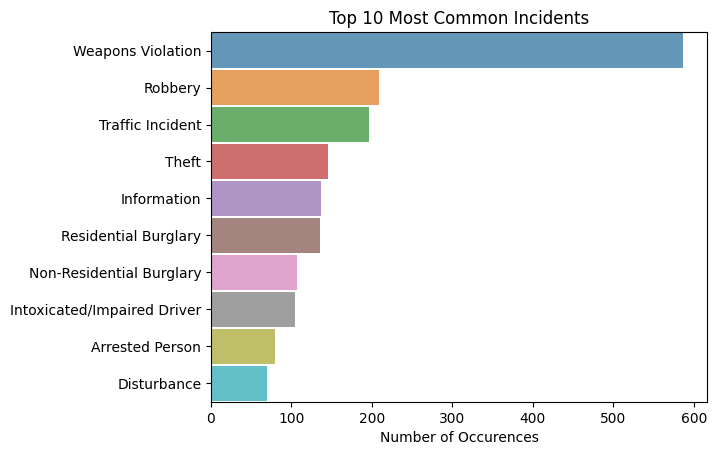

In [109]:
# Plotting Top 10 Most Common Incidents
incident_counts = df["incident"].value_counts()[:10] 
fig, ax = plt.subplots()
sns.barplot(y=incident_counts.index, x=incident_counts.values, 
            width=0.95, alpha=0.75, orient="h", ax=ax)
plt.title("Top 10 Most Common Incidents")
plt.xlabel("Number of Occurences")

In [112]:
#

str

<AxesSubplot: xlabel='year,month'>

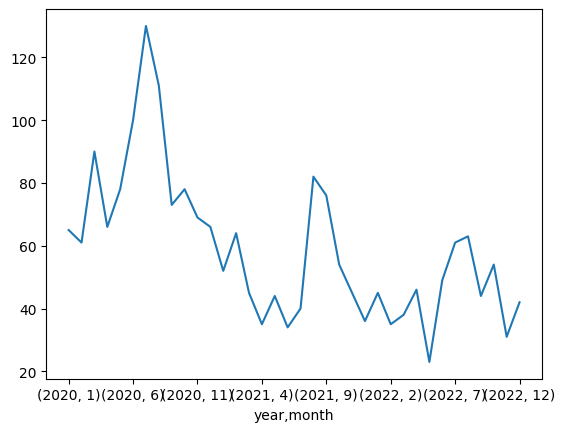

In [137]:
df1 = df[df["date"] > "2019-12-31"]
df1['date'].groupby([df1.date.dt.year.rename("year"), 
                                  df1.date.dt.month.rename("month")]).agg('count').plot()


#sns.lineplot(x="date", y="" data=df)

<AxesSubplot: >

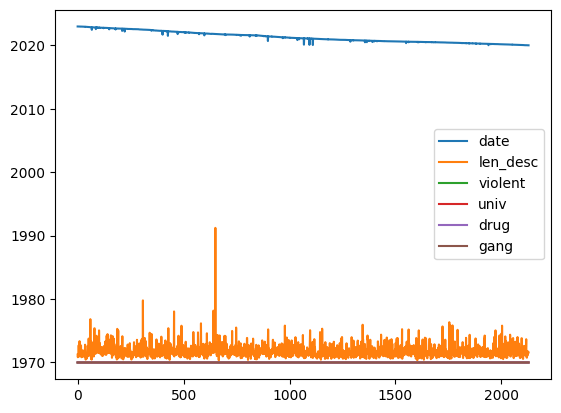

In [138]:
# dictionary? {month: count of incident type}
sns.lineplot(x="date", y=, data=df1)



<AxesSubplot: >

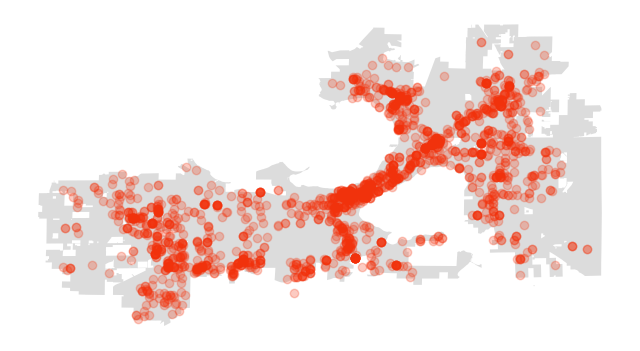

In [181]:
# do this plot by incident type, over time, etc.
# Would be cool to do subplots based on year, or the type of incident
# Red = Violent crime, Other color= Nonviolent crime, to find most dangerous ara
## possibly subset data based on each type of incident, then plot over eachtoher

madison_shape = gpd.read_file("City_Limit.shp")
ax = madison_shape.plot(color="gainsboro", figsize=(8,8))
ax.set_axis_off()
geodf.plot(ax=ax,color="xkcd:vermillion", alpha=0.25)
# title and labels?

<AxesSubplot: >

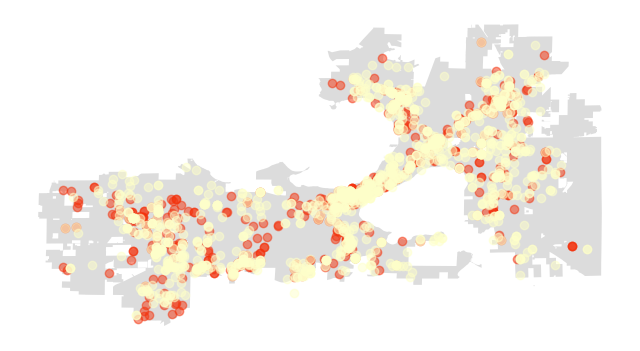

In [182]:
# custom colormap? figure out a way to implement gradient colormap, checkout 320 materials for how to make plots look better...
ax = madison_shape.plot(color="gainsboro", figsize=(8,8))

violent_incidents = geodf[geodf["violent"]==1]
nonviolent_incidents = geodf[geodf["violent"]==0]
ax.set_axis_off()
violent_incidents.plot(color="xkcd:vermillion", alpha=0.50, ax=ax)
nonviolent_incidents.plot(color="xkcd:ecru", alpha=0.50, ax=ax)

In [183]:
import geoplot
ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(geodf, ax=ax, zorder=1)

ModuleNotFoundError: No module named 'geoplot'

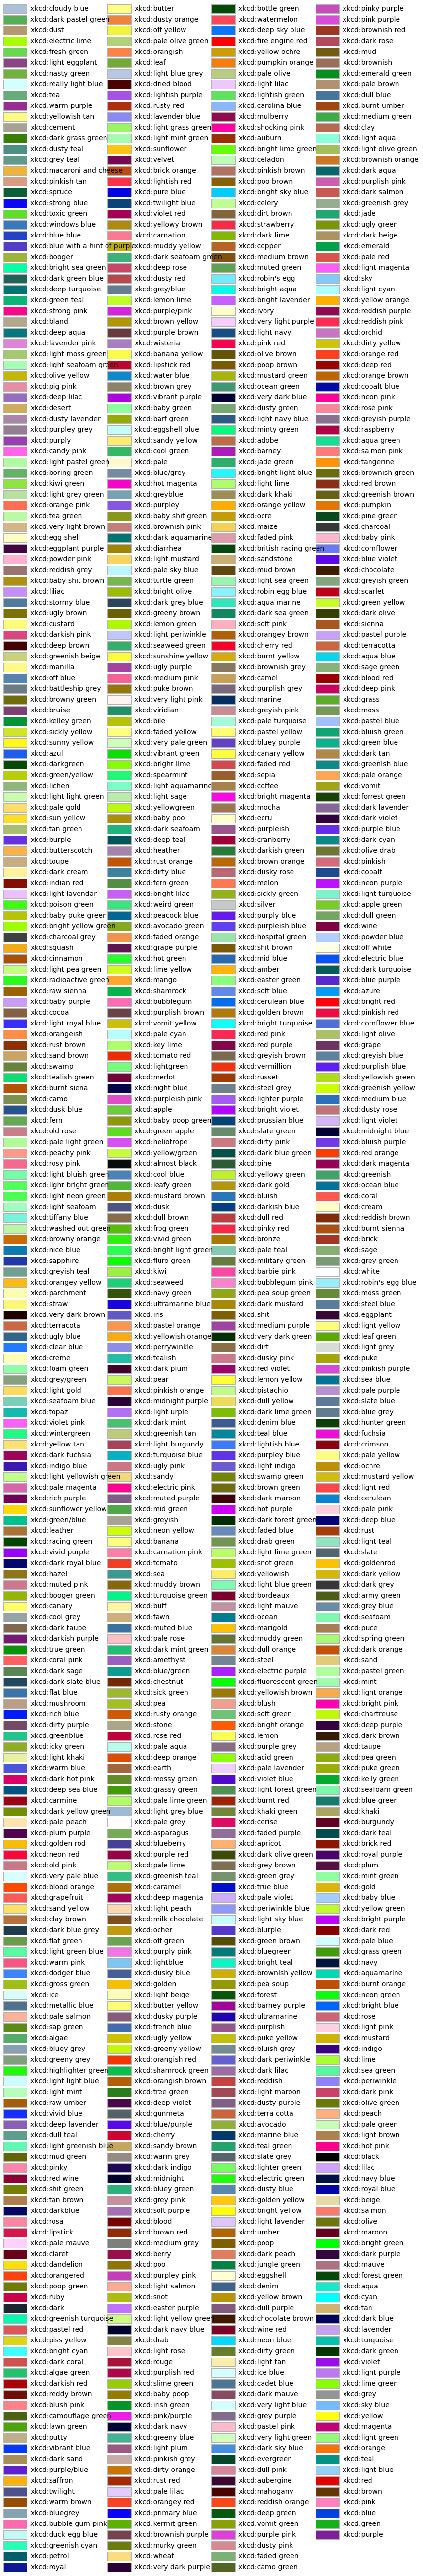

In [156]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
## DELETE thIS AND THE PNG

def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")

In [71]:
## Number of Incidents over time, by type?? Overlapping Line Plot baby lets go
## plotting univ, drug, gang over time
## line1 = weapons violation, line2 = intoxicated driver, etc. by month of the year
#value counts of everything

madison_shape = gpd.read_file("City_Limit.shp")

ax = madison_shape.plot(color="grey")
geoplot.plot(column = "coords", ax=ax, color="c")

# size of points to number of incidents


NameError: name 'addr_test' is not defined

In [3]:
df = pd.read_csv("incident_data.csv")

In [5]:
df["incident"].unique()

array(['Damaged Property', 'Fraud', 'Traffic Incident', 'Missing Adult',
       'Robbery', 'Weapons Violation', 'Murder/Homicide', 'Disturbance',
       'Information', 'Intoxicated/Impaired Driver', 'Arrested Person',
       'Residential Burglary', 'Suspicious Person', 'Theft', 'Battery',
       'Sexual Assault', 'Check Person', 'Drug Investigation',
       'Traffic incident/Road Rage', 'Missing Juvenile',
       'Non-Residential Burglary', 'Overdose', 'Domestic/Family Trouble',
       'Fight (In Progress)', 'Miscellaneous Sex Offense',
       'Suspicious Vehicle', 'Trespassing Complaint', 'Special Event',
       'Death Investigation', 'Attempted Homicide', 'Threats',
       'Unwanted Person', 'Attempt to Locate Person',
       'Animal Complaint - Bite', 'Animal Complaint - Disturbance',
       'Exposure', 'Injured Person', 'Neighbor Trouble', 'Child Abuse'],
      dtype=object)

In [184]:
df["address"].value_counts()

Madison:Madison, WI                   11
West Towne Mall:Madison, WI           10
E. Washington Ave.:Madison, WI         9
400 W. Gilman St.:Madison, WI          8
E Washington Ave:Madison, WI           8
                                      ..
3100  Muir Field Rd:Madison, WI        1
7200  Tempe Dr:Madison, WI             1
300 S. Henry St.:Madison, WI           1
2900 E Washington Ave.:Madison, WI     1
500 N. Frances St.:Madison, WI         1
Name: address, Length: 1714, dtype: int64

In [8]:
#Average violent crime rate
sum(df["violent"])/len(df["violent"])

0.28578110383536015

In [11]:
df.describe() 
# create histograms for features
# Could tie in an economic dataset


,violent
count,2138.000000
mean,0.285781
std,0.451891
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<AxesSubplot: >

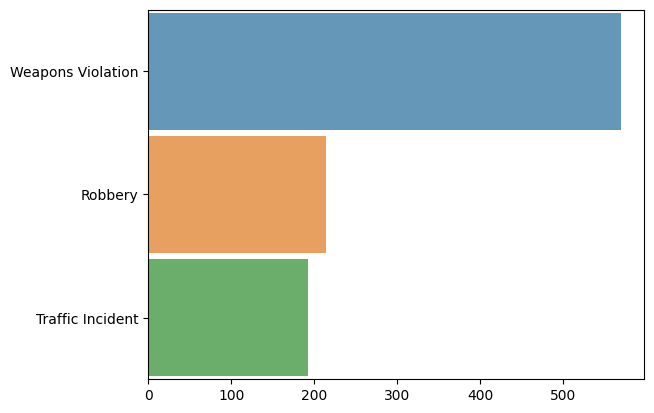

In [14]:
## Top 3 Most Common Incidents by year
# fig, ax = plt.subplots()
# incident_counts2 = df["incident"].value_counts()[:3]
# year_list = pd.Series([date[-4:] for date in df["date"]])
# sns.barplot(x=incident_counts2.values, y=incident_counts2.index,
#            width=0.95, alpha=0.75, ax=ax)
#plt.title("")


In [ ]:
# # Remove Information incidents?

# Heat Map / KDE
# Do an overlapping Line plot
# What is the most popping street
# Incident type vs reporting officer

# trends over time


# FUllY INTERACTIVE DASHBOARD

# incidents thus far in 2023
#    Display top three headlines
#    Total number of Incidents so far in 2022, this month, 
#    Display graphs/maps, svgs
#   incident by type and by year
#    Display crime by last week, month, year
#    Heat map of Crime? KDE or whatever
# Project Ideas:
# Multiple Linear Regression,
#     these are good to explain in business context, 
# Classification Problem, 
#   Predict the Neighborhood ( or other variable ) based on the data
# Regressor, determining best outcome, Log loss
# Feature Engineer ideas: How far away from the nearest school, church,  important point
#  Clustering ^^^^
# Flask Integration into personal Website
# Economic/Poverty level of the neighborhood
# Predicitng Number of INcidents per neighborhood/etc.
 # number of churhces and schools
    # Divorce rate, etc. 
    # over time

# def format_address(address):
#     address = address.upper().strip() # strips whitespace and makes all lowercase
#     address = address.translate(str.maketrans('', '', string.punctuation))
#     address = re.sub(r"S ", "SOUTH ", address)
#     address = re.sub(r"N ", "SOUTH ", address)
#     address = re.sub(r"E ", "SOUTH ", address)
#     address = re.sub(r"W ", "West ", address)
#     #address = re.sub(pattern, replacement, string)
#     return address
#     #pass

# Sample visualizer could be cool


# What Street has the most incidents occur?
#df["address"].value_counts()
# Look into Geopy to clean address, extract lat and lon
#Maybe email to tyler


In [15]:
df["incident"].unique()

array(['Damaged Property', 'Fraud', 'Traffic Incident', 'Missing Adult',
       'Robbery', 'Weapons Violation', 'Murder/Homicide', 'Disturbance',
       'Information', 'Intoxicated/Impaired Driver', 'Arrested Person',
       'Residential Burglary', 'Suspicious Person', 'Theft', 'Battery',
       'Sexual Assault', 'Check Person', 'Drug Investigation',
       'Traffic incident/Road Rage', 'Missing Juvenile',
       'Non-Residential Burglary', 'Overdose', 'Domestic/Family Trouble',
       'Fight (In Progress)', 'Miscellaneous Sex Offense',
       'Suspicious Vehicle', 'Trespassing Complaint', 'Special Event',
       'Death Investigation', 'Attempted Homicide', 'Threats',
       'Unwanted Person', 'Attempt to Locate Person',
       'Animal Complaint - Bite', 'Animal Complaint - Disturbance',
       'Exposure', 'Injured Person', 'Neighbor Trouble', 'Child Abuse'],
      dtype=object)

In [32]:
## INCLUDE BUSINESS?CITY APPLICATIONS
## MAYBE INCORPORATE ML SOMEHOW,
## Future Questions, what else could we try to answer
# Plotting Ideas
#    Number of incidents over time, by incident type
#    Univ, drug, gang, etc. over time
#    

True